In [0]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [4]:
model = MobileNet(weights='imagenet',include_top=True)
print(model.summary())

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

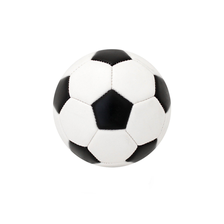

[805]
40960/35363 [==================================] - 0s 0us/step
('n04254680', 'soccer_ball', 0.9999937)
('n03530642', 'honeycomb', 3.8624266e-06)
('n03255030', 'dumbbell', 4.442445e-07)
('n02782093', 'balloon', 3.7038953e-07)
('n04548280', 'wall_clock', 3.1438807e-07)


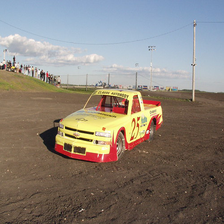

[751]
('n04037443', 'racer', 0.713195)
('n03100240', 'convertible', 0.10089735)
('n04285008', 'sports_car', 0.07707628)
('n03930630', 'pickup', 0.026353123)
('n02704792', 'amphibian', 0.011636178)


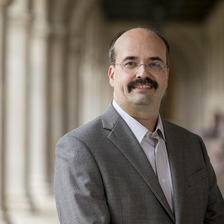

[834]
('n04350905', 'suit', 0.98860943)
('n04591157', 'Windsor_tie', 0.0045674685)
('n10148035', 'groom', 0.0029069774)
('n04479046', 'trench_coat', 0.001326871)
('n02992529', 'cellular_telephone', 0.00035402988)


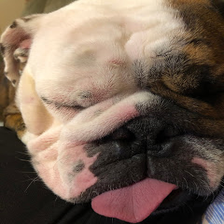

[254]
('n02110958', 'pug', 0.4952781)
('n02108915', 'French_bulldog', 0.39188802)
('n02108089', 'boxer', 0.05534917)
('n02108422', 'bull_mastiff', 0.02163659)
('n02112706', 'Brabancon_griffon', 0.016767126)


In [7]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions
 
w = 224
h = 224
c = 3

images = [
    "https://cdn.shopify.com/s/files/1/0712/4751/products/SMA-01_2000x.jpg?v=1537468751",
    "https://farm2.static.flickr.com/1394/967537586_87b1358ad3.jpg",
    "https://sites.wustl.edu/jeffheaton/files/2016/07/jheaton_wustl1-262izm5-458x458.jpg",
    "https://1.bp.blogspot.com/-0vGbvWUrSAA/XP-OurPTA4I/AAAAAAAAgtg/TGx6YiGBEGIMjnViDjvVnYzYp__DJ6I-gCLcBGAs/s320/B%252Bt%2525aMbJQkm3Z50rqput%252BA.jpg"
]


def make_square(img):
  cols,rows = img.size

  if rows>cols:
    pad=(rows-cols)/2
    img = img.crop(pad,0,cols,cols)
  else:
    pad=(cols-rows)/2
    img = img.crop(0,pad,rows,rows)
for url in images:
  x = []
  ImageFile.LOAD_TRUNCATED_IMAGES = False
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  img.load()

  img = img.resize((w,h),Image.ANTIALIAS)
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  pred = model.predict(x)

  display(img)
  print(np.argmax(pred,axis=1))

  lst = decode_predictions(pred, top=5)
  for itm in lst[0]:
    print(itm)
  




